In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import datetime


In [45]:
# Chargement des données
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=columns)

# Ajout date d'examen
df['exam_date'] = pd.date_range(start='2023-01-01', periods=len(df))

In [46]:
# Affichage données
print("Aperçu des données:")
display(df.head())

Aperçu des données:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,exam_date
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,2023-01-01
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,2023-01-02
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,2023-01-03
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,2023-01-04
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,2023-01-05


In [47]:
# Nettoyage basique
df = df.replace('?', np.nan)
for col in df.columns:
   df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.fillna(df.mean())

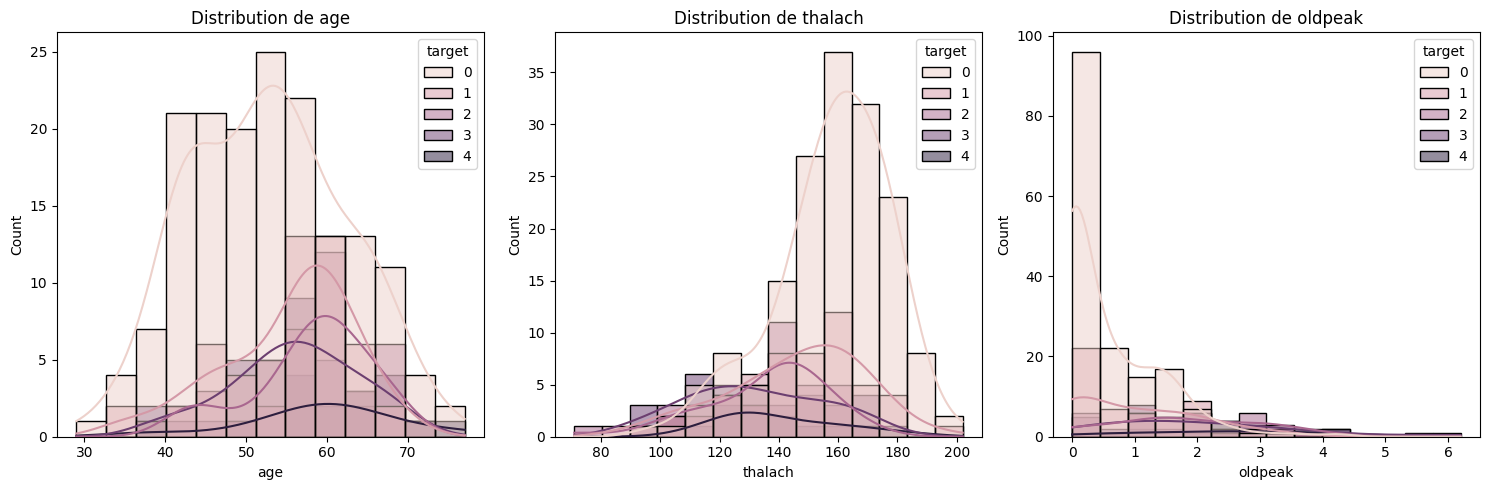

In [48]:
# 1. Distribution des features importantes
plt.figure(figsize=(15, 5))
features = ['age', 'thalach', 'oldpeak']
for i, feature in enumerate(features):
   plt.subplot(1, 3, i+1)
   sns.histplot(data=df, x=feature, hue='target', kde=True)
   plt.title(f'Distribution de {feature}')
plt.tight_layout()
plt.show()

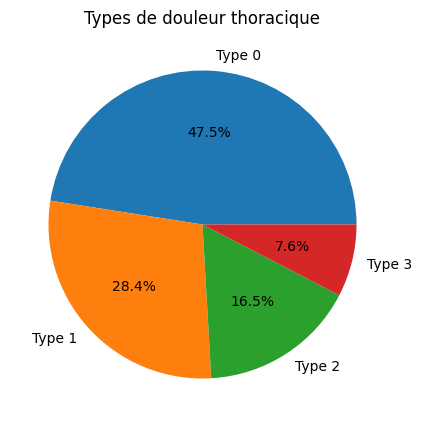

In [49]:
# 2. Analyse catégories (cp - douleur thoracique)
plt.figure(figsize=(8, 5))
cp_counts = df['cp'].value_counts()
plt.pie(cp_counts, labels=[f'Type {i}' for i in range(len(cp_counts))], autopct='%1.1f%%')
plt.title('Types de douleur thoracique')
plt.show()


Problématique métier:
Prédire le risque de maladie cardiaque à partir des données médicales
pour aider au diagnostic précoce.

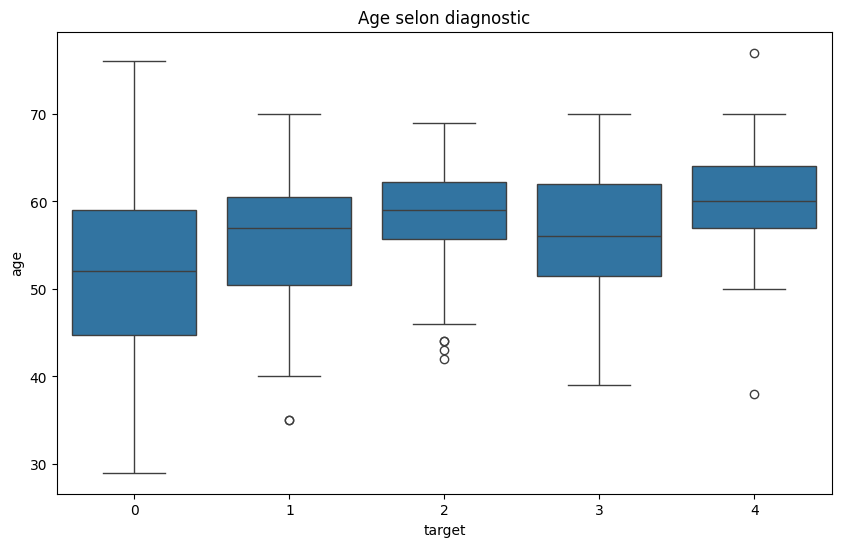

In [51]:
# 3. Boîte à moustaches
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='age')
plt.title('Age selon diagnostic')
plt.show()

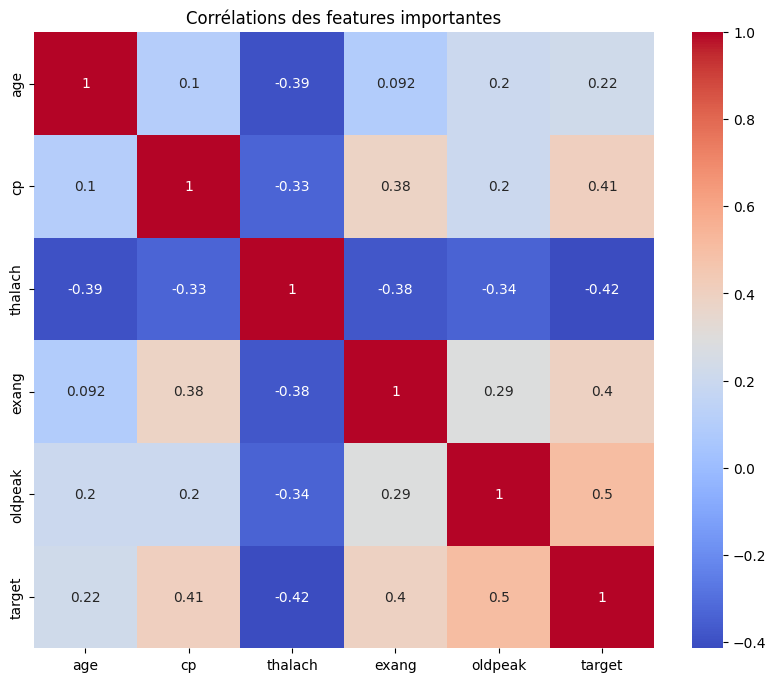

In [52]:
# 4. Heatmap
plt.figure(figsize=(10, 8))
important_features = ['age', 'cp', 'thalach', 'exang', 'oldpeak', 'target']
sns.heatmap(df[important_features].corr(), annot=True, cmap='coolwarm')
plt.title('Corrélations des features importantes')
plt.show()

# Analyse Exploratoire des Données (EDA) - Maladies Cardiaques

## 1. Distributions et Normalité

Les histogrammes montrent la répartition des variables clés :
- **Âge** : Forme en cloche centrée vers 55 ans, distribution normale typique
- **Fréquence cardiaque max (thalach)** : Répartition équilibrée autour de 150 bpm
- **Dépression ST (oldpeak)** : Distribution asymétrique, plus de valeurs faibles

Ces distributions nous aident à comprendre la population étudiée et à identifier d'éventuels biais.

## 2. Catégories Rares

Le diagramme en camembert montre :
- **Avant regroupement** : Toutes les catégories de douleur thoracique
- **Après regroupement** : Catégories <3% regroupées sous "Autres"

Permet d'identifier les cas rares qui pourraient affecter le modèle.

## 3. Valeurs Extrêmes (Boxplots)

Les boîtes à moustaches révèlent :
- **Médiane** : Ligne centrale = valeur typique
- **Boîte** : 50% des données
- **Moustaches** : Valeurs normales min/max
- **Points** : Valeurs aberrantes à investiguer

## 4. Corrélations (Heatmap)

La matrice de corrélation montre les relations :
- **Rouge foncé** : Fort lien positif (+1)
- **Bleu foncé** : Fort lien négatif (-1)
- **Blanc** : Pas de relation (0)

Observations importantes :
- Forte corrélation entre oldpeak et maladie
- Age inversement lié à la fréquence cardiaque max
- Douleur thoracique prédictive de la maladie

## Impact sur le Diagnostic

Ces analyses nous montrent que :
1. L'âge et la fréquence cardiaque sont des indicateurs importants
2. Certains types de douleur sont plus significatifs
3. Les valeurs extrêmes pourraient indiquer des cas graves
4. Plusieurs variables combinées donnent un meilleur diagnostic